In [25]:
import pandas as pd

from settings import INTERIM

import matplotlib.pyplot as plt

In [2]:
scoring = pd.read_pickle(INTERIM / 'master_score.pkl')
team_splits = pd.read_pickle(INTERIM / 'teams_team_splits.pkl')

In [3]:
scoring.head()

,firstName,lastName,pos,playerID,year,tmID,GP,G,A,Pts,SOG
0,Antti,Aalto,C,aaltoan01,1997,ANA,3.0,0.0,0.0,0.0,1.0
1,Antti,Aalto,C,aaltoan01,1998,ANA,73.0,3.0,5.0,8.0,61.0
2,Antti,Aalto,C,aaltoan01,1999,ANA,63.0,7.0,11.0,18.0,102.0
3,Antti,Aalto,C,aaltoan01,2000,ANA,12.0,1.0,1.0,2.0,18.0
4,Justin,Abdelkader,L,abdelju01,2007,DET,2.0,0.0,0.0,0.0,6.0


In [4]:
three_years= scoring.loc[(scoring['year'] > 2000) & (scoring['year'] < 2004)]

In [5]:
three_years.head()

,firstName,lastName,pos,playerID,year,tmID,GP,G,A,Pts,SOG
9,Ramzi,Abid,L,abidra01,2002,PHO,30.0,10.0,8.0,18.0,52.0
10,Ramzi,Abid,L,abidra01,2002,PIT,3.0,0.0,0.0,0.0,7.0
11,Ramzi,Abid,L,abidra01,2003,PIT,16.0,3.0,2.0,5.0,35.0
39,Craig,Adams,R,adamscr01,2001,CAR,33.0,0.0,1.0,1.0,17.0
40,Craig,Adams,R,adamscr01,2002,CAR,81.0,6.0,12.0,18.0,107.0


In [6]:
three_years = three_years.drop_duplicates(subset=['playerID', 'year'])

In [7]:
counts = three_years['playerID'].value_counts()
counts

playerID
zyuzian01    3
zubruda01    3
adamscr01    3
adamske01    3
aebisda01    3
            ..
lilesjo01    1
lintnri01    1
aulinja01    1
babchan01    1
balejjo01    1
Name: count, Length: 1320, dtype: int64

In [9]:
index = counts.loc[counts == 3].sample(3).index
index

Index(['nedoran01', 'gonchse01', 'kapanni01'], dtype='object', name='playerID')

In [10]:
df_3 = three_years.loc[three_years['playerID'].isin(index)]
df_3


,firstName,lastName,pos,playerID,year,tmID,GP,G,A,Pts,SOG
8688,Sergei,Gonchar,D,gonchse01,2001,WAS,76.0,26.0,33.0,59.0,216.0
8689,Sergei,Gonchar,D,gonchse01,2002,WAS,82.0,18.0,49.0,67.0,224.0
8690,Sergei,Gonchar,D,gonchse01,2003,WAS,56.0,7.0,42.0,49.0,127.0
11982,Niko,Kapanen,C,kapanni01,2001,DAL,9.0,0.0,1.0,1.0,3.0
11983,Niko,Kapanen,C,kapanni01,2002,DAL,82.0,5.0,29.0,34.0,80.0
11984,Niko,Kapanen,C,kapanni01,2003,DAL,67.0,1.0,5.0,6.0,57.0
18352,Andrej,Nedorost,C,nedoran01,2001,CBS,7.0,0.0,2.0,2.0,12.0
18353,Andrej,Nedorost,C,nedoran01,2002,CBS,12.0,0.0,1.0,1.0,10.0
18354,Andrej,Nedorost,C,nedoran01,2003,CBS,9.0,2.0,0.0,2.0,16.0


In [11]:
basic_df_3 = df_3[['playerID', 'year', 'G']]
basic_df_3

,playerID,year,G
8688,gonchse01,2001,26.0
8689,gonchse01,2002,18.0
8690,gonchse01,2003,7.0
11982,kapanni01,2001,0.0
11983,kapanni01,2002,5.0
11984,kapanni01,2003,1.0
18352,nedoran01,2001,0.0
18353,nedoran01,2002,0.0
18354,nedoran01,2003,2.0


In [15]:
pivot = basic_df_3.pivot(index='playerID', columns='year', values='G')


In [16]:
pivot.index

Index(['gonchse01', 'kapanni01', 'nedoran01'], dtype='object', name='playerID')

In [17]:
pivot.columns

Index([2001, 2002, 2003], dtype='int64', name='year')

In [20]:
pivot.index.name = None

In [21]:
pivot.columns.name = None

In [22]:
pivot

,2001,2002,2003
gonchse01,26.0,18.0,7.0
kapanni01,0.0,5.0,1.0
nedoran01,0.0,0.0,2.0


In [23]:
pivot.index.name = 'playerID'
pivot.index.columns = 'year'

<function matplotlib.pyplot.show(close=None, block=None)>

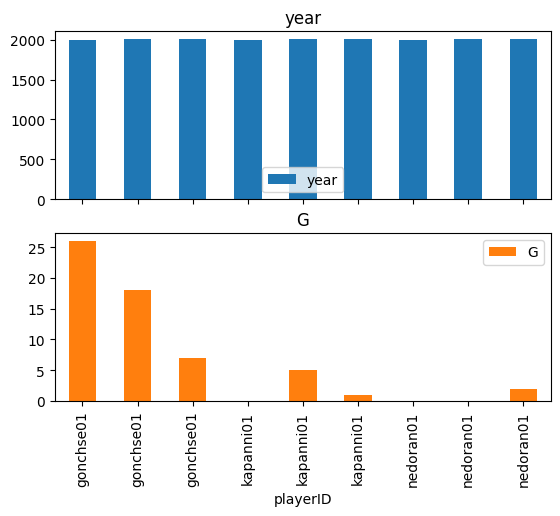

In [27]:

ax1, ax2 = basic_df_3.set_index('playerID').plot(kind='bar', subplots=True)

plt.show

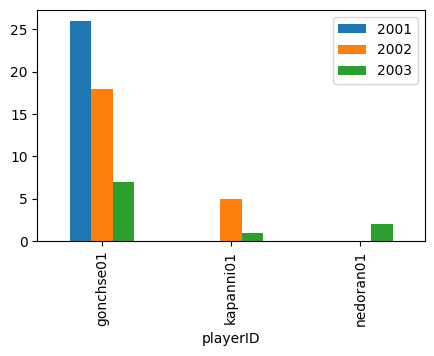

In [28]:
fig, ax = plt.subplots(figsize=(5, 3))
pivot.plot(ax=ax, kind='bar')
plt.show()

In [29]:
pivot.melt()

,variable,value
0,2001,26.0
1,2001,0.0
2,2001,0.0
3,2002,18.0
4,2002,5.0
5,2002,0.0
6,2003,7.0
7,2003,1.0
8,2003,2.0


In [31]:
pivot.reset_index(inplace=True)

In [32]:
pivot.melt(id_vars='playerID')

,playerID,variable,value
0,gonchse01,2001,26.0
1,kapanni01,2001,0.0
2,nedoran01,2001,0.0
3,gonchse01,2002,18.0
4,kapanni01,2002,5.0
5,nedoran01,2002,0.0
6,gonchse01,2003,7.0
7,kapanni01,2003,1.0
8,nedoran01,2003,2.0


In [33]:
pivot.melt(id_vars='playerID', var_name='year', value_name='goals')

,playerID,year,goals
0,gonchse01,2001,26.0
1,kapanni01,2001,0.0
2,nedoran01,2001,0.0
3,gonchse01,2002,18.0
4,kapanni01,2002,5.0
5,nedoran01,2002,0.0
6,gonchse01,2003,7.0
7,kapanni01,2003,1.0
8,nedoran01,2003,2.0


In [ ]:
pivot.melt(id_vars='playerID', value_vars=[201, 2002],var_name='year', value_name='goals')

In [34]:
larger_df_3 = df_3[['playerID', 'tmID', 'year', 'G']]
larger_df_3

,playerID,tmID,year,G
8688,gonchse01,WAS,2001,26.0
8689,gonchse01,WAS,2002,18.0
8690,gonchse01,WAS,2003,7.0
11982,kapanni01,DAL,2001,0.0
11983,kapanni01,DAL,2002,5.0
11984,kapanni01,DAL,2003,1.0
18352,nedoran01,CBS,2001,0.0
18353,nedoran01,CBS,2002,0.0
18354,nedoran01,CBS,2003,2.0


In [35]:
larger_df_3.pivot(index=['playerID', 'tmID'], columns='year', values='G')

,year,2001,2002,2003
playerID,tmID,,,
gonchse01,WAS,26.0,18.0,7.0
kapanni01,DAL,0.0,5.0,1.0
nedoran01,CBS,0.0,0.0,2.0


In [36]:
larger_df_3 = df_3[['playerID',  'year', 'G', 'A']]
larger_df_3

,playerID,year,G,A
8688,gonchse01,2001,26.0,33.0
8689,gonchse01,2002,18.0,49.0
8690,gonchse01,2003,7.0,42.0
11982,kapanni01,2001,0.0,1.0
11983,kapanni01,2002,5.0,29.0
11984,kapanni01,2003,1.0,5.0
18352,nedoran01,2001,0.0,2.0
18353,nedoran01,2002,0.0,1.0
18354,nedoran01,2003,2.0,0.0


In [37]:
result = larger_df_3.pivot(index=['playerID'], columns='year', values=['G', 'A'])

In [38]:
result

G                A            
year       2001  2002 2003  2001  2002  2003
playerID                                    
gonchse01  26.0  18.0  7.0  33.0  49.0  42.0
kapanni01   0.0   5.0  1.0   1.0  29.0   5.0
nedoran01   0.0   0.0  2.0   2.0   1.0   0.0

In [41]:
result.index

Index(['gonchse01', 'kapanni01', 'nedoran01'], dtype='object', name='playerID')

In [39]:
result.columns

MultiIndex([('G', 2001),
            ('G', 2002),
            ('G', 2003),
            ('A', 2001),
            ('A', 2002),
            ('A', 2003)],
           names=[None, 'year'])

In [43]:
result.iloc[2, 3]

np.float64(2.0)

In [45]:
result.loc['kapanni01', ('A', 2001)]

np.float64(1.0)